1) 랜덤 포레스트 이용하기

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# 사이킷런에서 제공하는 MNIST 데이터셋
mnist = fetch_openml('mnist_784')
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [3]:
print(mnist.data.shape, mnist.target.shape)  # (70000, 784), (70000,)

(70000, 784) (70000,)


In [4]:
print(type(mnist.data), type(mnist.target))  # DataFrame, Series

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [5]:
# Target 개수 확인하기
mnist.target.value_counts()  # 1(7877), 7(7293), ..., 5(6313)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [6]:
# 첫번째 이미지 데이터 보기
mnist.data.loc[0].values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

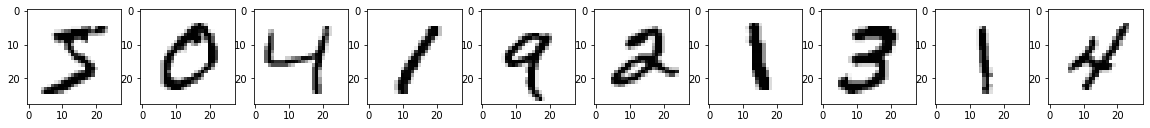

In [7]:
# 0~9번째 데이터 시각화해보기
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):  # 0~9까지
  axs[i].imshow(mnist.data.loc[i].values.reshape(28, 28), cmap='gray_r')  # 28*28로 바꿔줌
plt.show()

In [8]:
# 0~9번째 타겟값 보기
print([mnist.target[i] for i in range(10)])

['5', '0', '4', '1', '9', '2', '1', '3', '1', '4']


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,
                                                    test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)  # (56000, 784), (14000, 784)

(56000, 784) (14000, 784)


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [11]:
from sklearn.metrics import accuracy_score
pred = rf.predict(X_test)
accuracy_score(y_test, pred)

0.9655

2) 인공신경망 이용하기 (입력층 - 출력층)

In [12]:
from tensorflow import keras
keras.__version__

'2.8.0'

In [13]:
# 케라스에서 제공하는 MNIST 데이터셋
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [14]:
print(train_images.shape, train_labels.shape)  # (60000, 28, 28) (60000,)
print(test_images.shape, test_labels.shape)  # (10000, 28, 28) (10000,)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
print(type(train_images), type(train_labels))  # numpy.ndarray, numpy.ndarray

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [16]:
# 첫번째 이미지 데이터 보기
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

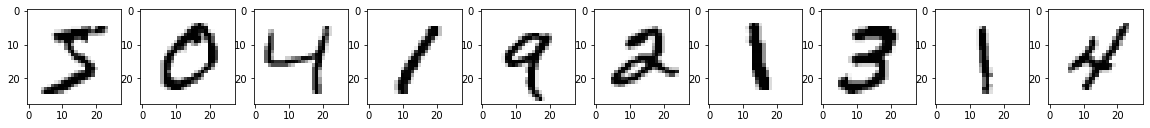

In [17]:
# 0~9번째 데이터 시각화해보기
fig, axs = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
  axs[i].imshow(train_images[i], cmap='gray_r')
plt.show()

In [18]:
# 0~9번째 타겟값 보기
print([train_labels[i] for i in range(10)])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


In [19]:
# 이미지 데이터를 0과 1사이 값으로 정규화하고, reshape을 하여 일렬로 펼치기
train_scaled = train_images / 255.0
test_scaled = test_images / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)  # (60000, 28, 28) -> (60000, 784)
test_scaled = test_scaled.reshape(-1, 28*28)  # (10000, 28, 28) -> (10000, 784)

In [20]:
# 타겟 데이터 원-핫 인코딩하기
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)
train_labels[0]  # 원-핫 인코딩 결과 ([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
from keras import models, layers
model = models.Sequential()  # 케라스의 가장 간단한 신경망 모델, 순서대로 연결된 층을 쌓아서 구성
model.add(layers.Dense(10, activation='softmax', input_shape=(784,)))  # 출력층 활성화 함수

In [22]:
model.summary()  # 위에서 계산한 매개변수 개수와 일치하는지 확인하기

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers  # 모델의 모든 layer 보기

In [24]:
model.layers[0].get_weights()  # 훈련 전 가중치, 편향값 (가중치는 무작위 초기화, 편향은 0으로 초기화)

[array([[ 0.01833639, -0.03271685,  0.02490215, ..., -0.06138114,
          0.06006942, -0.05658764],
        [ 0.07496493, -0.08276886, -0.03915134, ..., -0.08241236,
         -0.0609367 ,  0.02762536],
        [ 0.02179001, -0.00512011, -0.03152459, ..., -0.00335372,
         -0.0519618 , -0.08082648],
        ...,
        [ 0.01141904,  0.05092611,  0.05149589, ..., -0.01917677,
         -0.03377908, -0.00483815],
        [ 0.00277987, -0.07564363, -0.03419157, ..., -0.05806014,
         -0.0433695 ,  0.08439878],
        [ 0.07780371, -0.05055841,  0.0726374 , ...,  0.0565436 ,
          0.06629615, -0.00385542]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [25]:
# 모델 컴파일: 손실함수와 옵티마이저 지정
model.compile(loss='categorical_crossentropy',  # 손실함수
              optimizer='rmsprop',  # 옵티마이저
              metrics=['accuracy'])  # 측정 지표: loss(손실, 디폴트) + accuracy

In [26]:
# 모델 훈련
model.fit(train_scaled, train_labels, epochs=5)  # 전체 훈련 세트를 5번 돌리기

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4386 - accuracy: 0.8830
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3027 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2899 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2841 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2810 - accuracy: 0.9245


In [27]:
model.layers[0].get_weights()  # 훈련 후 가중치, 편항값

[array([[ 0.01833639, -0.03271685,  0.02490215, ..., -0.06138114,
          0.06006942, -0.05658764],
        [ 0.07496493, -0.08276886, -0.03915134, ..., -0.08241236,
         -0.0609367 ,  0.02762536],
        [ 0.02179001, -0.00512011, -0.03152459, ..., -0.00335372,
         -0.0519618 , -0.08082648],
        ...,
        [ 0.01141904,  0.05092611,  0.05149589, ..., -0.01917677,
         -0.03377908, -0.00483815],
        [ 0.00277987, -0.07564363, -0.03419157, ..., -0.05806014,
         -0.0433695 ,  0.08439878],
        [ 0.07780371, -0.05055841,  0.0726374 , ...,  0.0565436 ,
          0.06629615, -0.00385542]], dtype=float32),
 array([-0.54402095,  0.27649158,  0.08929649, -0.2582164 , -0.03904854,
         0.8699512 , -0.29507467,  0.4087308 , -1.0195341 , -0.2542546 ],
       dtype=float32)]

In [28]:
# 모델 평가
model.evaluate(test_scaled, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.2832 - accuracy: 0.9259


[0.28322649002075195, 0.9258999824523926]

3) 인공신경망 이용하기 (입력층 - 은닉층 - 출력층)

In [29]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [30]:
train_scaled = train_images / 255.0
test_scaled = test_images / 255.0
# reshape(-1, 28*28)은 하지 말기
# 타겟 데이터 원-핫 인코딩도 하지 말기

In [31]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten 층 추가 (펼치는 역할만 함, 파라미터 없음)
# model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Dense(100, activation='sigmoid'))
# model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 출력층 활성화 함수

In [32]:
model.summary()  # 위에서 계산한 매개변수 개수와 일치하는지 확인하기

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               157000    
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.layers  # 모델의 모든 layer 보기

In [34]:
# 레이블이 정수 하나로 이루어져 있고 클래스가 배타적인 경우
# 원-핫 인코딩을 하지 않고 손실함수로 'sparse_categorical_crossentropy'를 사용
model.compile(loss='sparse_categorical_crossentropy',  # 손실함수
              optimizer='rmsprop',  # 옵티마이저
              metrics=['accuracy'])  # 측정 지표: loss(손실, 디폴트) + accuracy

In [35]:
model.fit(train_scaled, train_labels, epochs=5)  # 전체 훈련 세트를 5번 돌리기

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2171 - accuracy: 0.9352
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0984 - accuracy: 0.9712
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0732 - accuracy: 0.9791
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0596 - accuracy: 0.9835
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0479 - accuracy: 0.9868


In [36]:
model.evaluate(test_scaled, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9762


[0.09979310631752014, 0.9761999845504761]